In [1]:
import pandas as pd
import os

In [ ]:
#https://realpython.com/pandas-python-explore-dataset/

In [3]:
path = r"D:\data_figees"

In [9]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 5)

In [5]:
nba = pd.read_csv(os.path.join(path,"nba_all_elo.csv"))

In [79]:
nba.columns.tolist()

['gameorder',
 'game_id',
 'lg_id',
 '_iscopy',
 'year_id',
 'date_game',
 'seasongame',
 'is_playoffs',
 'team_id',
 'fran_id',
 'pts',
 'elo_i',
 'elo_n',
 'win_equiv',
 'opp_id',
 'opp_fran',
 'opp_pts',
 'opp_elo_i',
 'opp_elo_n',
 'game_location',
 'game_result',
 'forecast',
 'notes',
 'date_played']

In [12]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.29483,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.64007,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.70517,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.35993,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.01226,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.63110,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.69278,CHS,Stags,63,1300.0000,1309.6521,A,L,0.36890,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.86405,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.64007,NaN


In [11]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [14]:
nba["date_played"] = pd.to_datetime(nba["date_game"])

In [16]:
nba.loc[nba["team_id"] == "MNL", "date_played"].min()

Timestamp('1948-11-04 00:00:00')

In [17]:
nba.loc[nba['team_id'] == 'MNL', 'date_played'].max()

Timestamp('1960-03-26 00:00:00')

In [18]:
nba.loc[nba["team_id"] == "MNL", "date_played"].agg(("min", "max"))

min   1948-11-04
max   1960-03-26
Name: date_played, dtype: datetime64[ns]

In [36]:
col = ['pts']
nba[nba["team_id"] == "BOS"][col].sum().values[0]

626484

In [31]:
type(nba.loc[nba["team_id"] == "BOS", "pts"])

pandas.core.series.Series

In [29]:
nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

In [42]:
#nba["year_id"].unique().tolist()
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape

(12658, 24)

In [40]:
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape

(5424, 24)

In [45]:
#nba["fran_id"].unique().tolist()

In [43]:
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape

(27797, 24)

In [46]:
nba[(nba["_iscopy"] == 0) &
    (nba["pts"] > 100) &
    (nba["opp_pts"] > 100) &
    (nba["team_id"] == "BLB")
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.9351,1419.4280,38.55754,MNL,Lakers,115,1637.9852,1640.4923,H,L,0.33894,NaN,1949-02-26
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.6687,1356.6470,25.79779,BOS,Celtics,105,1591.1434,1563.1652,H,W,0.28185,NaN,1953-01-10
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.8323,1346.3594,24.87624,MNL,Lakers,112,1665.4396,1668.9125,H,L,0.22424,NaN,1953-01-14
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.5239,1282.2396,19.57968,NYK,Knicks,113,1649.1516,1651.4359,H,L,0.17897,at Boston MA,1953-03-11
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.7493,1301.9685,20.73699,BOS,Celtics,111,1591.4943,1593.2749,H,L,0.25336,at Worcester MA,1954-02-22


In [78]:
#nba.groupby("fran_id", sort=False)["pts"].sum()

In [49]:
df = nba.copy()
df.shape

(126314, 24)

In [50]:
df["difference"] = df.pts - df.opp_pts
df.shape

(126314, 25)

In [52]:
df["difference"].max()

68

In [56]:
col = ["year_id","game_result","game_location"]
df[col].head()

,year_id,game_result,game_location
0,1947,L,H
1,1947,W,A
2,1947,W,H
3,1947,L,A
4,1947,L,H


In [57]:
dico = {"game_result": "result", "game_location": "location","year_id":"Annee"}
renamed_df = df.rename(columns=dico)

In [59]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
renamed_df.drop(elo_columns, inplace=True, axis=1)

In [61]:
renamed_df["date_game"] = pd.to_datetime(renamed_df["date_game"])

In [64]:
"game_location" in renamed_df.columns.tolist()

False

In [65]:
"game_location" in df.columns.tolist()

True

In [66]:
df["game_location"].nunique()

3

In [67]:
df["game_location"].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

In [68]:
df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

In [69]:
df["game_result"] = pd.Categorical(df["game_result"])

In [70]:
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape

(5424, 24)

In [71]:
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape

(126314, 23)

In [72]:
data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(value="",inplace=True)

In [73]:
data_with_default_notes["notes"].describe()

count     126314
unique       232
top             
freq      120890
Name: notes, dtype: object

In [74]:
%matplotlib inline

<Axes: xlabel='year_id'>

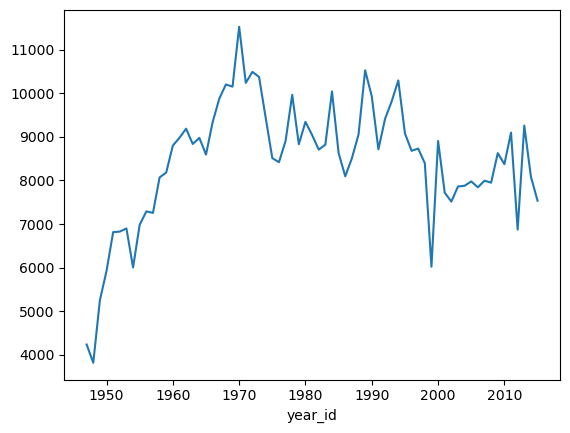

In [75]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

<Axes: >

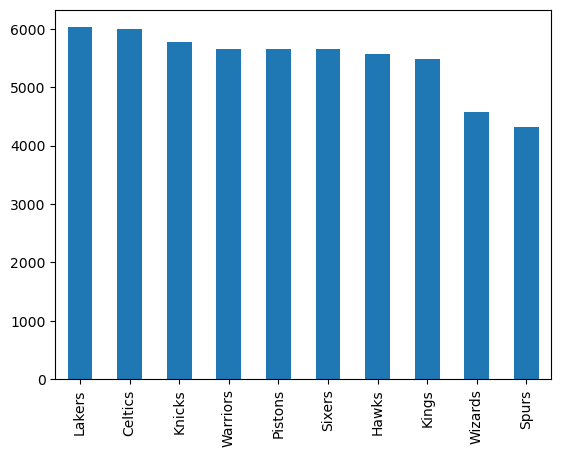

In [76]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

<Axes: ylabel='game_result'>

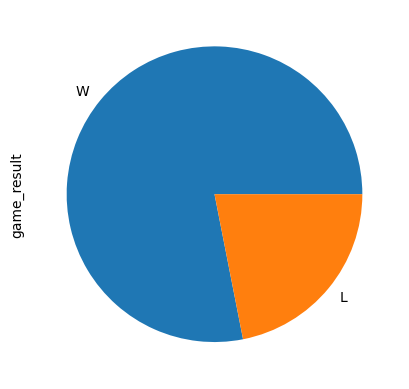

In [77]:
nba[(nba["fran_id"] == "Heat") & (nba["year_id"] == 2013)]["game_result"].value_counts().plot(kind="pie")